## 1-Shapiro Wilk Test 
( these tests are applied to check normality of data)

Tests wether a data sample has a Gaussian Distribution

**Assumptions**
1. Observations in each sample are independent and identically distributed(iid).
2. Interpretation

H0 is Null hypothesis

- H0 : the sample has a Gaussian/Normal distribution \
- H1 : the sample does not have a gaussian/normal distribution

In [1]:
# pip install scipy

# all statistics work will be with scipy library

In [2]:
# Example of the shapiro-wilk Normality Test

from scipy.stats import shapiro
data = [0.873 ,2.817,0.121, -0.945 , -0.055 , -1.436 , 0.360 ,-1.478 ,-1.637 , -1.869]

# now first lets just check shapiro test on this data

shapiro(data)

#Dont really need to initialise variables like stat and p, shapiro test itself gives the values

ShapiroResult(statistic=0.8951009511947632, pvalue=0.19340917468070984)

#### Following is the basic code to check the Normality of any data

In [3]:

from scipy.stats import shapiro
data = [0.873 ,2.817,0.121, -0.945 , -0.055 , -1.436 , 0.360 ,-1.478 ,-1.637 , -1.869]
stat, p = shapiro(data)

#print("stat :" , stat)
# print("p :" , p)

# print statement can be used differently to specify only 3 characters after decimal point:

print('stat=%.3f , p=%.3f' %(stat,p))

# the above code returns values of stat and P value
# if p value is greater than 0.05 then its gaussian/normal data, 

if p > 0.05:
    print('probably Gaussian/normal data')
else:
    print('probably not gaussian/ not normal data')

stat=0.895 , p=0.193
probably Gaussian/normal data


<AxesSubplot:>

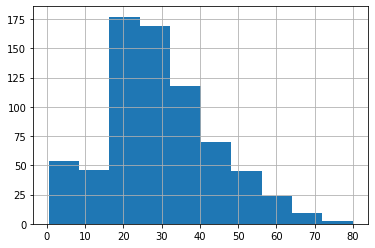

In [4]:
# now lets just use the above code and work with different data set

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ks= sns.load_dataset('titanic')

# now first lets try to make histogram of age col

ks['age'].hist()


c:\Users\AhmadLap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

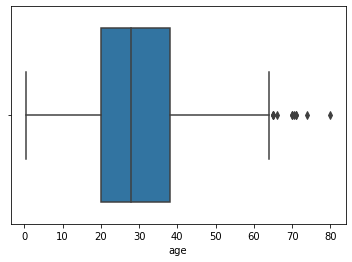

In [5]:
# the above histogram doesnt tell much about the normality of data
# lets create a box plot

sns.boxplot(ks['age'])

In [6]:
# Normality test for above data,
# because we cant tell exactly what the obove boxplot tells, and "median line" is not in center
# for this we need stat tests, and library scipy
# copy the same previous shapiro code 

from scipy.stats import shapiro
stat, p = shapiro(ks['age'])

print('stat=%.3f , p=%.3f' %(stat,p))

if p > 0.05:
    print('probably Gaussian/normal data')
else:
    print('probably not gaussian/ not normal data')




stat=nan , p=1.000
probably Gaussian/normal data


In [7]:
# it says the above data is normal
# but the boxplot's median line is not in center
#lets drop null values and see the box plot and shapiro test again

Data is normally distributed


c:\Users\AhmadLap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


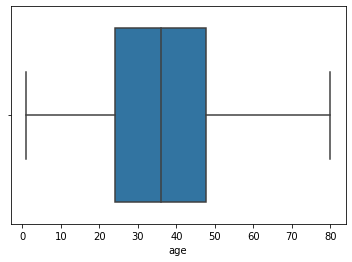

In [8]:
from scipy.stats import shapiro
ks= ks.dropna()
sns.boxplot(ks['age'])
# null values droped, now lets check with shapiro test

stat,p = shapiro(ks['age'])
if p>0.05 :
    print('Data is normally distributed')
else:
    print('Data is not Normally Distributed')

c:\Users\AhmadLap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

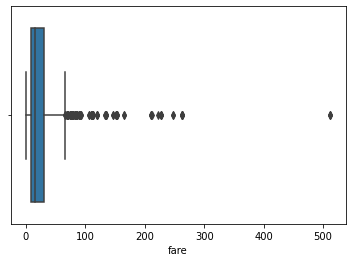

In [9]:
# Now lets check another variable
# same data but with "Fare" VAriable/column
# without dropping null

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ks= sns.load_dataset('titanic')

sns.boxplot(ks['fare'])


In [10]:
# Lets check the normality of "FAre" data

from scipy.stats import shapiro
stat,p = shapiro(ks['fare'])
print("p=" , p)
print("stat=" , stat)
if p>0.05 :
    print('Data is normal')
else:
    print('Data is not Normally Distributed')

p= 1.0789998175301091e-43
stat= 0.5218914747238159
Data is not Normally Distributed


In [11]:
# the data of col "Fare" is not normal, Although it shows pvalue=1.0 and that is greater than 0.05 meaning Data is normal BUT
# in the end there is exponent with poer -43 that means the values is nagative.
# lets draw histo plot to visualize

<AxesSubplot:>

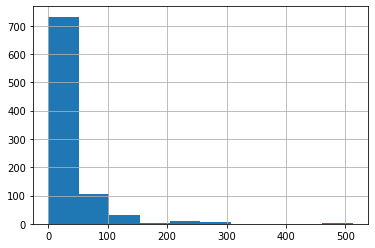

In [12]:
ks['fare'].hist()

# see the data is not normal

## -2 Corelation Test

### -1 Pearson's correlation coefficent
    It Tests whether two samples have a linear relationship.(matlab aik k barhny sey doosra barh rha hy k nhi)

**Assumptions**
1. Observations in each sample are independent and identically distributed(iid)
2. Observations in each sample are Normally distributed
3. Observations in each sample have the same varience
4. Interpretation
   
H0: The two samples are independent \
H1: There is dependency between the samples

- Pearson = Normally distributed data ( Parametric ) - Continuous Data
- Spearsman = Non-Normall Distributed ( Non Parametric) - Continuous Data

In [13]:
# Example of Pearson's correlation Test

from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = pearsonr(data1 , data2)
print("p=" , p)
print("stat=" , stat)

if p > 0.05:
    print('Probably Independent(no correlation)')
else:
    print('Probably dependent(correlation exist)')

p= 0.027872969514496207
stat= 0.6879696368388862
Probably dependent(correlation exist)


In [14]:
# now lets run this test with titanic data

from scipy.stats import pearsonr

ks = sns.load_dataset('titanic')

# lets see if there is corelation between cols of titanic data (age and fare)
# we have to remove NaN values otherwise it will give error("ValueError: array must not contain infs or NaNs")
ks=ks.dropna()
stat, p = pearsonr(ks['age'] , ks['fare'])
print("p=" , p)
print("stat=" , stat)

if p > 0.05:
    print('Probably Independent(no correlation)')
else:
    print('Probably dependent(correlation exist)')

p= 0.223185916258614
stat= -0.09073036394094937
Probably Independent(no correlation)


### -2 Spearman's Rank Correlation
It tests whether two samples have monotonic relationships

**Assumption**
1. Observations in each sample are independent and identically distributed(iid)
2. Observations in each sample can be ranked
3. Interpretation

H0: The samples are independent \
H1: There is dependency betweeen samples

In [15]:
# Example of Spearman's Rank Correlation test

from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]

stat, p = spearmanr(data1, data2)
print("p=" , p)
print("stat=" , stat)

if p > 0.05:
    print('Probably Independent(no correlation)')
else:
    print('Probably dependent(correlation exist)')

p= 0.0016368033159867143
stat= 0.8545454545454544
Probably dependent(correlation exist)


## 3- Chi-squared Test
It test whether two Categorical variables are Independent or related

**Assumptions**
Observations used in the calculation of the contingency table are independent. 25 or more examples in each cell of the contingency table.
Interpretation:

H0: The two samples are independent \
H1: There is dependency between samples

####  Youtube  comments under this video, I found helpful:
To apply Chi-squared Test on Titanic data, you will need to create a contingency table first.
For that you dont need to encode data in to Numerical values, Chi-squared test is devised for Categorical Variables. 

```
from scipy.stats import chi2_contingency
boat = boat.dropna()
data1 = boat['alive']
data2 = boat['who']
Create table between 2 categorical values
table = pd.crosstab(data1, data2, margins = False)
print(table)
```
pass this table to chi2_contingency function

### One hot encoding to encode data in numerical values 

In [16]:
# categorical_col = boat[['alive','who']]
# categorical_col.head()
# #example using scikit
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# #apply the one hot encoder
# encoder = OneHotEncoder(categories='auto')
# encoder.fit(categorical_col)
# df4_OneHot = encoder.transform(categorical_col).toarray()
# print('Transformed by One-hot Encoding: ')
# print(df4_OneHot)
# # encode labels with value between 0 and n_classes-1
# encoder = LabelEncoder()
# boat[['alive','who']] = categorical_col.apply(encoder.fit_transform)
# print('Replacing categories by numerical labels: ')
# print(boat[['alive','who']].head())

In [17]:
# Example of the Chi-Squared  test
from scipy.stats import chi2_contingency
ks = ks.dropna()
data1 = ks['alive']
data2 = ks['who']
table = pd.crosstab(data1, data2, margins = False)
print(table)

who    child  man  woman
alive                   
no         2   53      4
yes       11   34     78


In [18]:
# Example of Chi-squared Test

from scipy.stats import chi2_contingency
table= [[10,20,30],[6,9,17]]
stat, p, dof, expected = chi2_contingency(table)
print("p=" , p)
print("stat=" , stat)
if p > 0.05:
    print('Probably Independent(no correlation)')
else:
    print('Probably dependent(correlation exist)')

p= 0.873028283380073
stat= 0.27157465150403504
Probably Independent(no correlation)


## -3 Parametric Statristical hypothesis Test
### 1- Student's T-Test
It tests whether the means of two independent samples are significantly different.

**Assumptions**
1. Observations in each sample are independent and identically distributed(iid)
2. Observations in each sample are Normally distributed
3. Observations in each sample have the same varience
4. Interpretation

H0: The means of samples are equal \
H1: The means of samples are unequal


In [19]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same dataset')
else:
  print('Probably different data set')

stat=-0.326, p=0.748
Probably the same dataset


In [20]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = ks['age']
data2 = ks['fare']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same dataset')
else:
  print('Probably different data set')

stat=-7.481, p=0.000
Probably different data set


### 2- Paired Student's T-Test
It tests whether the means of two paired samples are significantly different, 

**Assumptions**
1. Observations in each sample are independent and identically distributed(iid)
2. Observations in each sample are Normally distributed
3. Observations in each sample have the same varience
4. Observations across all samples are paired

Interpretation

H0: The means of samples are equal \
H1: The means of samples are unequal

In [21]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same distribution')
else:
  print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


In [22]:
# Example of the Paired Student's t-test with titanic data
from scipy.stats import ttest_rel
data1 = ks['age']
data2 = ks['fare']
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same distribution')
else:
  print('Probably different distributions')

stat=-7.351, p=0.000
Probably different distributions


## -4 Analysis of Variance Test (ANOVA)
It tests whether the means of "two or more" independent samples are significantly different.
**Assumptions**
1. Observations in each sample are independent and identically distributed(iid)
2. Observations in each sample are Normally distributed
3. Observations in each sample have the same varience
4. Observations across all samples are paired

Interpretation

H0: The means of samples are equal \
H1: The means of samples are unequal


In [23]:
# Example of Analysis of Variance Test(ANOVA) 
# Tests whether means of 2 or more independent samples are significally different

from scipy.stats import f_oneway

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]

stat,p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same distribution')
else:
  print('Probably different distributions')


stat=0.096, p=0.908
Probably the same distribution
